In [1]:
import gzip
import os
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')

from Utilities import *

In [2]:
plt.rcParams.update({"pdf.fonttype": 42, 'text.usetex': True})

In [5]:
seed_list = [0]

# Convolution with Laplace kernel in 2d

### Varying width

In [6]:
width_list = [32, 128, 512, 1024]
color_dict = {32: 'blue', 128: 'green', 512: 'orange', 1024: 'red'}

In [7]:
dict = {}
dict_unbiased = {}

for seed in tqdm(seed_list):
    for width in width_list:
        path = f'results/VarPro_biased_width{width:.0f}_lmbda-3.0_gamma100.0_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, width)] = pickle.load(f)
        path_unbiased = f'results/VarPro_unbiased_width{width:.0f}_lmbda-3.0_gamma100.0_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path_unbiased, 'rb') as f:
            dict_unbiased[(seed, width)] = pickle.load(f)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:19<00:00, 19.22s/it]


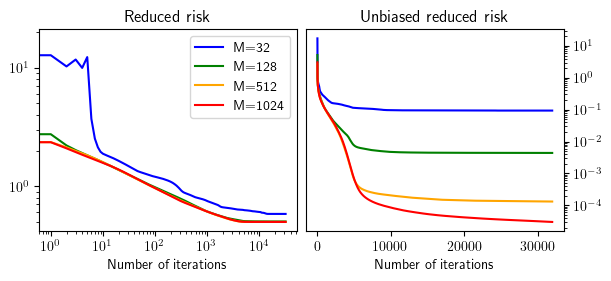

In [ ]:
p=0.3
fig, ax = plt.subplots(1, 2, figsize=(20 * p, 9 * p), constrained_layout=True)

for width in width_list:
    epochs = len(dict[(seed_list[0], width)]['loss_list'])
    res = np.zeros(epochs)
    res_unbiased = np.zeros(epochs)
    for seed in seed_list:
        res += np.array(dict[(seed, width)]['loss_list'])
        res_unbiased += np.array(dict_unbiased[(seed, width)]['loss_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    ax[0].plot(res, color=color_dict[width], label=f'M={width}')
    ax[1].plot(res_unbiased, color=color_dict[width])

ax[0].legend()
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel('Number of iterations')
ax[0].set_title('Reduced risk')


#ax[1].legend()
ax[1].set_yscale('log')
#ax[1].set_xscale('log')
ax[1].set_xlabel('Number of iterations')
ax[1].set_title('Unbiased reduced risk')
ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

#fig.savefig('convolution_width_risk.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 1.0, 'Distance to teacher distribution')

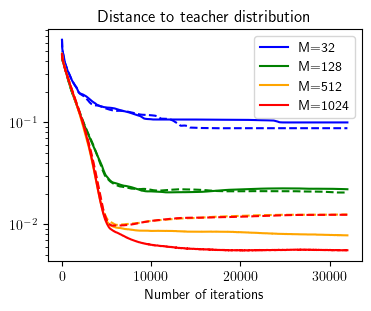

In [9]:
p=0.3
fig, ax = plt.subplots(figsize=(12 * p, 10 * p), constrained_layout=True)

for width in width_list:
    idx = dict[(0,width)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, width)]['distance_teacher_list'])
        res_unbiased += np.array(dict_unbiased[(seed, width)]['distance_teacher_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    ax.plot(idx, res_unbiased, color=color_dict[width], label=f'M={width}')
    ax.plot(idx, res, '--', color=color_dict[width])

ax.legend()
ax.set_yscale('log')
#ax[0].set_xscale('log')
ax.set_xlabel('Number of iterations')
ax.set_title('Distance to teacher distribution')


#fig.savefig('convolution_width_distance.pdf', format='pdf', bbox_inches='tight')

### Varying regularization strength

In [10]:
lmbda_list = [-1, -2, -3]
color_dict = {-1: 'blue', -2: 'green', -3: 'orange', -4: 'red', -5: 'black'}

In [11]:
dict = {}
dict_unbiased = {}

for seed in tqdm(seed_list):
    for lmbda in lmbda_list:
        path = f'results/VarPro_biased_width1024_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, lmbda)] = pickle.load(f)
        path_unbiased = f'results/VarPro_unbiased_width1024_lmbda{lmbda:.1f}_gamma100.0_N4096_ts-10.0_seed{seed}.pkl.gz'
        with gzip.open(path_unbiased, 'rb') as f:
            dict_unbiased[(seed, lmbda)] = pickle.load(f)

100%|██████████| 1/1 [00:19<00:00, 19.76s/it]


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_92819/2173440844.py:13: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(idx, res_unbiased, color=color_dict[lmbda], label=f'$\lambda=10^{{{lmbda}}}$')


Text(0.5, 1.0, 'Distance to teacher distribution')

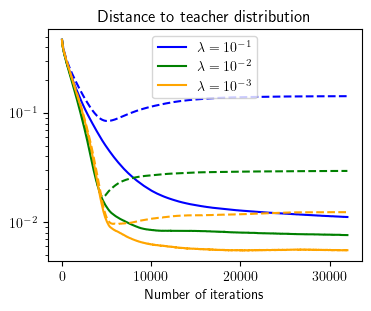

In [12]:
p=0.3
fig, ax = plt.subplots(figsize=(12 * p, 10 * p), constrained_layout=True)

for lmbda in lmbda_list:
    idx = dict[(0,lmbda)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    res_unbiased = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, lmbda)]['distance_teacher_list'])
        res_unbiased += np.array(dict_unbiased[(seed, lmbda)]['distance_teacher_list'])
    res /= len(seed_list)
    res_unbiased /= len(seed_list)
    ax.plot(idx, res_unbiased, color=color_dict[lmbda], label=f'$\lambda=10^{{{lmbda}}}$')
    ax.plot(idx, res, '--', color=color_dict[lmbda])
    

ax.legend()
ax.set_yscale('log')
#ax[0].set_xscale('log')
ax.set_xlabel('Number of iterations')
ax.set_title('Distance to teacher distribution')


#fig.savefig('convolution_lmbda_distance.pdf', format='pdf', bbox_inches='tight')

### Varying the shape of the target distribution

In [13]:
gamma_list = [100, -1]
gamma_name = {100: '100', -1: '+\infty'}
color_dict = {100: 'blue', -1: 'orange'}

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_92819/2839216466.py:2: SyntaxWarning: invalid escape sequence '\i'
  gamma_name = {100: '100', -1: '+\infty'}


In [14]:
dict = {}

for seed in tqdm(seed_list):
    for gamma in gamma_list:
        path = f'results/VarPro_unbiased_width1024_lmbda-2.0_gamma{gamma:.1f}_N4096_ts-10.0_seed{seed:.0f}.pkl.gz'
        with gzip.open(path, 'rb') as f:
            dict[(seed, gamma)] = pickle.load(f)

100%|██████████| 1/1 [00:05<00:00,  5.93s/it]


<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_92819/1793321284.py:9: SyntaxWarning: invalid escape sequence '\g'
  ax[0].plot(res, color=color_dict[gamma], label=f'$\gamma={gamma_name[gamma]}$')


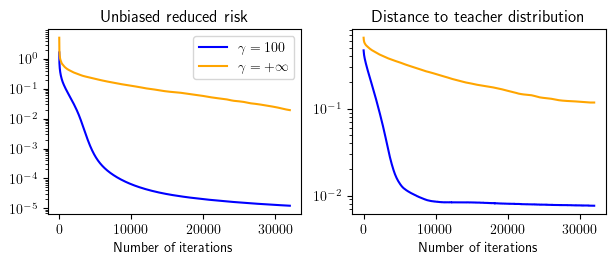

In [15]:
p=0.3
fig, ax = plt.subplots(1, 2, figsize=(24 * p, 8 * p), constrained_layout=False)

for gamma in gamma_list:
    res = np.zeros(32000)
    for seed in seed_list:
        res += np.array(dict[(seed, gamma)]['loss_list'])
    res /= len(seed_list)
    ax[0].plot(res, color=color_dict[gamma], label=f'$\gamma={gamma_name[gamma]}$')
    
    idx = dict[(0,gamma)]['distance_teacher_idx']
    res = np.zeros(len(idx))
    for seed in seed_list:
        res += np.array(dict[(seed, gamma)]['distance_teacher_list'])
    res /= len(seed_list)
    ax[1].plot(idx, res, color=color_dict[gamma])

ax[0].legend()
ax[0].set_yscale('log')
#ax[0].set_xscale('log')
ax[0].set_xlabel('Number of iterations')
ax[0].set_title('Unbiased reduced risk')


#ax[1].legend()
ax[1].set_yscale('log')
#ax[1].set_xscale('log')
ax[1].set_xlabel('Number of iterations')
ax[1].set_title('Distance to teacher distribution')
#ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

fig.subplots_adjust(hspace=0)

#fig.savefig('convolution_gamma.pdf', format='pdf', bbox_inches='tight')